## Sentiment Analysis 

`Pipeline for developing sentiment analysis task`

- Data Acquisition - https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset
- Data Preprocessing (Text Preparation)
- Feature Representation
- Model Selection
- Model Training
- Testing the model
- Deployment

### Import necessary libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import seaborn as sns

In [2]:
# !pip install gensim
# !pip install chardet

In [3]:
# To detect the encoding of the file
rawdata = open('Dataset/train.csv', 'rb').read()
result = chardet.detect(rawdata)
encoding = result['encoding']
print(encoding)

Windows-1252


In [4]:
df = pd.read_csv('Dataset/train.csv', encoding=encoding)

### Data Exploration

In [5]:
df.shape

(27481, 10)

In [6]:
df.head(2)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105


In [7]:
df.nunique()

textID              27481
text                27480
selected_text       22430
sentiment               3
Time of Tweet           3
Age of User             6
Country               195
Population -2020      195
Land Area (Km²)       193
Density (P/Km²)       136
dtype: int64

In [8]:
df = df.drop(df.columns[[0,2,4,5,6,7,8,9]], axis=1)

In [9]:
df.head(2)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative


In [10]:
print(df.isnull().sum())

text         1
sentiment    0
dtype: int64


In [11]:
df.dropna(inplace=True)

Text(0.5, 1.0, 'Sentiment Distribution')

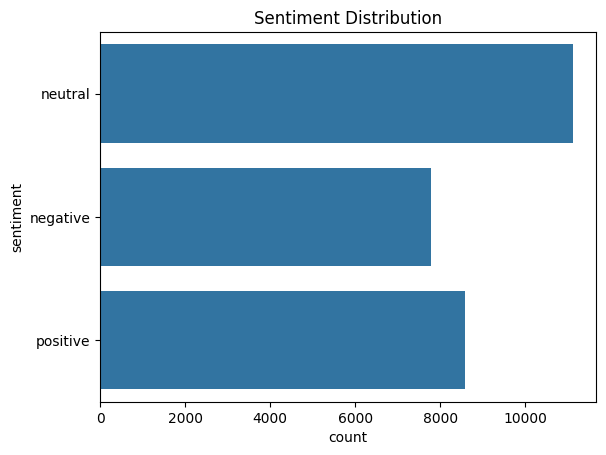

In [12]:
sns.countplot(df['sentiment'])
plt.title('Sentiment Distribution')

In [13]:
df.shape

(27480, 2)

### Text Preprocessing

1. **Lowercasing**: Convert all text to lowercase to ensure consistency in representation.

2. **Noise Removal**: Eliminate irrelevant characters, symbols, URLs or HTML tags from the text data.

3. **Handling Contractions**: Expand contractions into their full forms, e.g., "can't" to "cannot".

4. **Tokenization**: Split text into individual words or tokens.

5. **Stopword Removal**: Remove common words that do not carry significant meaning, such as "the", "is", "and".

6. **Punctuation Removal**: Remove punctuation marks from the text.

7. **Stemming**: Reduce words to their root form by removing suffixes, e.g., "running" to "run".

8. **Lemmatization**: Similar to stemming, but reduces words to their base or dictionary form, e.g., "running" to "run".

`Lowercasing`

In [14]:
df['text'][0]

' I`d have responded, if I were going'

In [15]:
df['text'] = df['text'].str.lower()

In [16]:
df['text'][0]

' i`d have responded, if i were going'

`Handling Contradictions`

In [17]:
contractions_dict = {
    "can't": "cannot",
    "won't": "will not",
    "don't": "do not",
    "didn't": "did not",
    "doesn't": "does not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "wouldn't": "would not",
    "shouldn't": "should not",
    "aren't": "are not",
    "weren't": "were not",
    "isn't": "is not",
    "ain't": "am not",
    "it's": "it is",
    "he's": "he is",
    "she's": "she is",
    "i'm": "i am",
    "i've": "i have",
    "you're": "you are",
    "you've": "you have",
    "you'll": "you will",
    "we're": "we are",
    "we've": "we have",
    "we'll": "we will",
    "they're": "they are",
    "they've": "they have",
    "they'll": "they will",
    "that's": "that is",
    "what's": "what is",
    "who's": "who is",
    "where's": "where is",
    "how's": "how is",
    "let's":"let us",
    "y'all":"you all",
    "we'd":"we would",
    "they'd":"they would",
    "you'd":"you would",
    "we've":"we have",
    "they've":"they have",
    "you've":"you have",
    "we're":"we are",
    "they're":"they are",
    "you're":"you are",
    "i'll":"i will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "i'd":"i would",
    "i`d":"i would",
    "he'd":"he would",
    "she'd":"she would",
    "it'd":"it would",
    "i've":"i have"    
}

In [18]:
def handle_contractions(text):
    for word, replacement in contractions_dict.items():
        text = text.replace(word, replacement)
    return text

df['contradictions'] = df['text'].apply(handle_contractions)

In [19]:
df['contradictions'][0]

' i would have responded, if i were going'

`Noise Removal` - Check for HTML tags and URLs or any unwanted symbols/characters

In [20]:
import re

def find_html_tags(text):
    pattern = r'<.*?>'
    matches = re.findall(pattern, text)
    return matches

df['html_tags'] = df['contradictions'].apply(find_html_tags)

In [21]:
df['html_tags'].value_counts() # no html tags

html_tags
[]                                              27468
[<(`-`)>]                                           1
[<=====8=====>]                                     1
[<never wear your pajama pants to school  >]        1
[<:baby boy:>]                                      1
[< who choose chem>]                                1
[<3 lurvee ya`ll[;>]                                1
[</whine>]                                          1
[<cries>]                                           1
[<sigh>]                                            1
[<.<    >]                                          1
[<i>]                                               1
[<emo>, </emo>]                                     1
Name: count, dtype: int64

In [22]:
def check_for_urls(text):
    pattern = r'https?://\S+|www\.\S+'
    urls = re.findall(pattern, text)
    return urls

df['urls'] = df['contradictions'].apply(check_for_urls)

In [23]:
df['urls'].value_counts() # urls present

urls
[]                                                                       26197
[http://tweet.sg]                                                           10
[http://ustre.am/2w5v)]                                                      5
[www.youtube.com/chineselearn]                                               4
[www...]                                                                     4
                                                                         ...  
[http://www.myspace.com/dica_grl, www.myspace.com/discosoutmurdersin]        1
[http://blip.fm/~5ygpg]                                                      1
[http://bit.ly/grrda]                                                        1
[http://myloc.me/feb]                                                        1
[http://twitpic.com/663vr]                                                   1
Name: count, Length: 1234, dtype: int64

In [24]:
def remove_urls(text):
    pattern = r'https?://\S+|www\.\S+'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

df['url_removed'] = df['contradictions'].apply(remove_urls)

`Tokenization` - WordTokenize and TweetTokenize

In [25]:
import nltk
from nltk.tokenize import word_tokenize

df['tokens'] = df['url_removed'].apply(word_tokenize)

In [26]:
df['tokens'][0]

['i', 'would', 'have', 'responded', ',', 'if', 'i', 'were', 'going']

In [27]:
# can't is separated into ca and n't, this is accepted in Sentiment Analysis but if you prefer to keep them as a single token, use TweetTokenizer
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer(reduce_len=True)
df['tokens1'] = df['url_removed'].apply(tokenizer.tokenize)

In [28]:
df['tokens1'][0]

['i', 'would', 'have', 'responded', ',', 'if', 'i', 'were', 'going']

`Stop Word Removal`

In [29]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['stop_words_removed'] = df['tokens1'].apply(lambda x: [word for word in x if word not in stop_words])

In [30]:
df['stop_words_removed'][0]

['would', 'responded', ',', 'going']

`Punctuation Removal`

In [31]:
df['stop_words_removed'][0]

['would', 'responded', ',', 'going']

In [32]:
import string

def remove_punctuation(words):
    table = str.maketrans('', '', string.punctuation)
    stripped = [i.translate(table) for i in words]
    return stripped

In [33]:
df['punctuation_removed'] = df['stop_words_removed'].apply(remove_punctuation)

In [34]:
df['punctuation_removed'][0]

['would', 'responded', '', 'going']

In [35]:
# remove empty strings
df['punctuation_removed'] = df['punctuation_removed'].apply(lambda x: [i for i in x if i])

In [36]:
df['punctuation_removed'][0] # ['',''] has been removed

['would', 'responded', 'going']

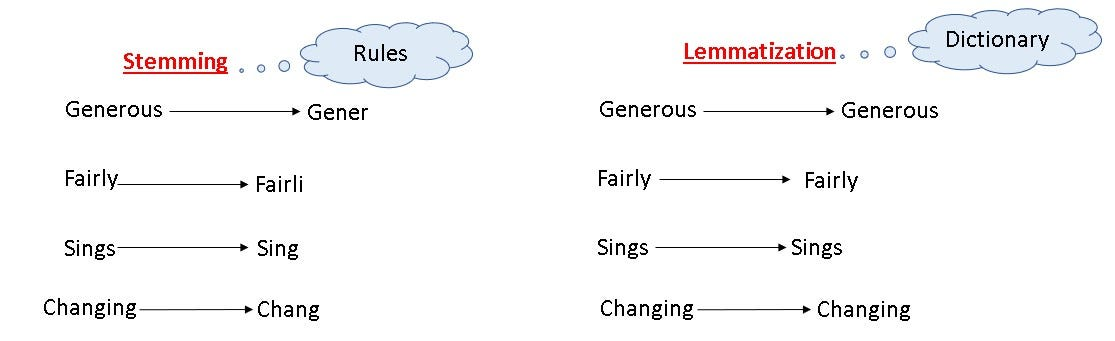

`Stemming`

In [37]:
import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df['stemmed'] = df['punctuation_removed'].apply(lambda x: [stemmer.stem(word) for word in x])

In [38]:
df['stemmed'][0]

['would', 'respond', 'go']

`Lemmatization`

In [39]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['lemmatized'] = df['punctuation_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [40]:
df['lemmatized'][0]

['would', 'responded', 'going']

### Feature Representation

- Bag of Words 
- TF-IDF 
- Word2Vec - Continuous Bag of Words, Skip gram 

In [41]:
df.head(2)

,text,sentiment,contradictions,html_tags,urls,url_removed,tokens,tokens1,stop_words_removed,punctuation_removed,stemmed,lemmatized
0,"i`d have responded, if i were going",neutral,"i would have responded, if i were going",[],[],"i would have responded, if i were going","[i, would, have, responded, ,, if, i, were, go...","[i, would, have, responded, ,, if, i, were, go...","[would, responded, ,, going]","[would, responded, going]","[would, respond, go]","[would, responded, going]"
1,sooo sad i will miss you here in san diego!!!,negative,sooo sad i will miss you here in san diego!!!,[],[],sooo sad i will miss you here in san diego!!!,"[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, miss, san, diego, !, !, !]","[sooo, sad, miss, san, diego]","[sooo, sad, miss, san, diego]","[sooo, sad, miss, san, diego]"


In [42]:
df = df[['sentiment', 'lemmatized']]

In [43]:
df['sentiment'].value_counts() 

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

In [44]:
df['sentiment'] = df['sentiment'].map({'neutral': 1, 'negative': 0, 'positive': 2})

In [45]:
df.columns = ['sentiment', 'text']

In [46]:
df.head(2)

,sentiment,text
0,1,"[would, responded, going]"
1,0,"[sooo, sad, miss, san, diego]"


In [47]:
sentences = df['text'].values.tolist()
sentences[:2]

[['would', 'responded', 'going'], ['sooo', 'sad', 'miss', 'san', 'diego']]

In [48]:
len(sentences)

27480

In [49]:
sentences_list = [' '.join(i) for i in sentences]

In [50]:
sentences_list[:2]

['would responded going', 'sooo sad miss san diego']

`BOW`

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bow_matrix = cv.fit_transform(sentences_list) 
bow_array = bow_matrix.toarray()

In [52]:
bow_array.shape


(27480, 22901)

In [53]:
type(bow_matrix), type(bow_array)

(scipy.sparse._csr.csr_matrix, numpy.ndarray)

`TF-IDF`

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences_list)
tfidf_array = tfidf_matrix.toarray()

The fit_transform method expects a sequence of strings as input, where each string is a document. If df['text'] is a list of lists of words, you'll need to join the words into a single string for each document.

`Word2Vec` - CBOW

In [55]:
from gensim.models import Word2Vec

cbow = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=0)

In [56]:
vocab = cbow.wv.index_to_key 
type(vocab)

list

In [57]:
vocab[:10]

['day', 'good', 'get', 'like', 'go', 'love', 'u', 'work', 'today', 'going']

In [58]:
# Get vector for a word
vector = cbow.wv['word']
vector, vector.shape

(array([-0.21534169,  0.3087205 ,  0.19482067, -0.17580529, -0.00426495,
        -0.82901514,  0.27153003,  1.0006039 , -0.2196306 , -0.3287837 ,
        -0.2912599 , -0.4996982 , -0.18230441,  0.08078524,  0.33478463,
        -0.36532876,  0.12509698, -0.46997064, -0.02391442, -0.66464865,
         0.26253438,  0.274277  ,  0.31344593, -0.25407398, -0.15737793,
        -0.00401379, -0.41642871, -0.23272708, -0.46558258,  0.05922022,
         0.6709235 , -0.06766735,  0.21791   , -0.18093042, -0.18859702,
         0.5074656 , -0.05820607, -0.38268733, -0.30534118, -0.6922061 ,
        -0.09104927, -0.25093982, -0.20781623,  0.04111832,  0.5514701 ,
        -0.1350412 , -0.30346605, -0.1899702 ,  0.2741291 ,  0.29839915,
         0.13262403, -0.35919908, -0.0631748 , -0.1624879 , -0.15114474,
         0.10445885,  0.32652855, -0.05749556, -0.28740582,  0.16354315,
         0.12434775,  0.22975154, -0.04690525, -0.02783939, -0.45502314,
         0.3229011 ,  0.24853036,  0.19356786, -0.6

In [59]:
# Find most similar words
similar_words = cbow.wv.most_similar('world')
similar_words

[('lovely', 0.9987196326255798),
 ('bday', 0.998155415058136),
 ('special', 0.9977480173110962),
 ('amazing', 0.9976269602775574),
 ('dinner', 0.9968589544296265),
 ('wishing', 0.9968435764312744),
 ('best', 0.9968082904815674),
 ('thank', 0.9966809749603271),
 ('beautiful', 0.9964883923530579),
 ('bless', 0.9964612722396851)]

In [60]:
def get_mean_vector(model, sentence):
    words = [word for word in sentence if word in vocab] # if word is not in vocab, it will be ignored
    if len(words) >= 1: 
        return np.mean(model.wv[words], axis=0) # mean of all the word vectors in the sentence, vector_size = 100(initialized earlier)
    return np.zeros((100,)) # return a vector of zeros if no words are in vocab

In [61]:
sentences[:2]

[['would', 'responded', 'going'], ['sooo', 'sad', 'miss', 'san', 'diego']]

In [62]:
len(sentences)

27480

In [63]:
cbow_array = []

for sentence in sentences:
    mean_vec = get_mean_vector(cbow, sentence)
    cbow_array.append(mean_vec)
    
cbow_array = np.array(cbow_array)

In [64]:
cbow_array.shape

(27480, 100)

In [65]:
cbow_array[0]

array([-0.32716173,  0.40932357,  0.20838529,  0.00459619, -0.03994175,
       -0.97486866,  0.15860412,  1.35440707, -0.30029657, -0.31602079,
       -0.35712928, -0.76023161, -0.30677825,  0.32332739,  0.32108879,
       -0.53600287,  0.16991256, -0.6452713 , -0.19283986, -1.00610232,
        0.15302746,  0.3617174 ,  0.64532542, -0.57869637,  0.00222818,
       -0.10525452, -0.44234994, -0.39641538, -0.63824749,  0.15134852,
        0.86856323,  0.09429891,  0.36660007, -0.16791573, -0.38369641,
        0.68918872, -0.0398998 , -0.55554473, -0.24146283, -1.24519086,
        0.01860099, -0.39809805, -0.05161366,  0.20698598,  0.71580195,
       -0.32509586, -0.31290755, -0.16275343,  0.42745146,  0.46869576,
        0.27164429, -0.57021028, -0.12669669, -0.25674787, -0.30305952,
        0.26769775,  0.27855569, -0.09371591, -0.59359992, -0.00765604,
        0.32465374,  0.37438136, -0.01381021, -0.07065711, -0.67368567,
        0.44982231,  0.32317057,  0.64879715, -0.71320128,  0.68

`Word2Vec` - Skipgram


In [66]:
sg = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)

In [67]:
vocab_sg = sg.wv.index_to_key

In [68]:
sg_array = [] 

for sentence in sentences:
    sg_array.append(get_mean_vector(sg, sentence))
    
sg_array = np.array(sg_array)

In [69]:
sg_array.shape

(27480, 100)

### Build the model 

In [70]:
y_train = df['sentiment'].values

`Naive Bayes`

Designed only for non-negative values, cbow and skipgram contains real-values vector which may have negative values hence we only use bow and tf-idf for naive bayes

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
bow_model = MultinomialNB()
bow_model.fit(bow_array,y_train)
print('BOW - Naive Bayes Score', bow_model.score(bow_array,y_train))

BOW - Naive Bayes Score 0.8263100436681222


In [73]:
tfidf_model = MultinomialNB()
tfidf_model.fit(tfidf_array,y_train)
print('TF IDF - Naive Bayes Score', tfidf_model.score(tfidf_array,y_train))

TF IDF - Naive Bayes Score 0.7858078602620088


`Decision Tree`

In [74]:
from sklearn.tree import DecisionTreeClassifier 

In [75]:
cbow_model = DecisionTreeClassifier()
cbow_model.fit(cbow_array,y_train)
print('CBOW - Decision Tree Score', cbow_model.score(cbow_array,y_train))

CBOW - Decision Tree Score 0.99490538573508


In [76]:
sg_model = DecisionTreeClassifier()
sg_model.fit(sg_array,y_train)
print('Skipgram - Decision Tree Score', sg_model.score(sg_array,y_train))

Skipgram - Decision Tree Score 0.99490538573508


### Test Data

In [77]:
x_test = ['What is not to like about this product.',
          'Not bad. ',
          'Not an issue. ',
          'Not buggy. ',
          'Not happy. ',
          'Not user-friendly. ',
          'Not good. ',
          'Is it any good? ',
          'I do not dislike horror movies.  ',
          'Disliking horror movies is not uncommon.  ',
          'Sometimes I really hate the show.  ',
          'I love having to wait two months for the next series to come out!  ',
          'The final episode was surprising with a terrible twist at the end. ',
          'The film was easy to watch but I would not recommend it to my friends.',
          "I LOL'd at the end of the cake scene"]

In [78]:
y_test = [2,1,1,1,0,0,0,1,2,0,0,2,0,0,1]

In [79]:
sentiments = {0:'Negative', 1:'Neutral', 2:'Positive'}

In [80]:
x_test = pd.DataFrame({'text': x_test}) # for easier processing
x_test.head()

,text
0,What is not to like about this product.
1,Not bad.
2,Not an issue.
3,Not buggy.
4,Not happy.


In [81]:
x_test['text'] = x_test['text'].str.lower()
x_test['contradictions'] = x_test['text'].apply(handle_contractions)
x_test['url_removed'] = x_test['contradictions'].apply(remove_urls)
x_test['tokens'] = x_test['url_removed'].apply(tokenizer.tokenize)
x_test['stop_words_removed'] = x_test['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
x_test['punctuation_removed'] = x_test['stop_words_removed'].apply(remove_punctuation)
x_test['punctuation_removed'] = x_test['punctuation_removed'].apply(lambda x: [i for i in x if i])
x_test['lemmatized'] = x_test['punctuation_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [82]:
x_test.head()

,text,contradictions,url_removed,tokens,stop_words_removed,punctuation_removed,lemmatized
0,what is not to like about this product.,what is not to like about this product.,what is not to like about this product.,"[what, is, not, to, like, about, this, product...","[like, product, .]","[like, product]","[like, product]"
1,not bad.,not bad.,not bad.,"[not, bad, .]","[bad, .]",[bad],[bad]
2,not an issue.,not an issue.,not an issue.,"[not, an, issue, .]","[issue, .]",[issue],[issue]
3,not buggy.,not buggy.,not buggy.,"[not, buggy, .]","[buggy, .]",[buggy],[buggy]
4,not happy.,not happy.,not happy.,"[not, happy, .]","[happy, .]",[happy],[happy]


In [83]:
test_sentences = x_test['lemmatized'].values.tolist()
print(test_sentences[:2])
test_sentences_list = [' '.join(i) for i in test_sentences]
print(test_sentences_list[:2])

[['like', 'product'], ['bad']]
['like product', 'bad']


In [84]:
bow_test = cv.transform(test_sentences_list).toarray()

tfidf = tfidf.transform(test_sentences_list).toarray()

cbow_test = []
for sentence in test_sentences:
    cbow_test.append(get_mean_vector(cbow, sentence))
cbow_test = np.array(cbow_test)

sg_test = []
for sentence in test_sentences:
    sg_test.append(get_mean_vector(sg, sentence))
sg_test = np.array(sg_test)

In [85]:
from sklearn.metrics import classification_report

In [86]:
y_bow = bow_model.predict(bow_test)
print('BOW - Naive Bayes Predictions:', [sentiments[i] for i in y_bow])
print('Classification Report for BOW - Naive Bayes', classification_report(y_test, y_bow))

print("-"*50)

y_tfidf = tfidf_model.predict(tfidf)
print('TF IDF - Naive Bayes Predictions:', [sentiments[i] for i in y_tfidf])
print('Classification Report for TF IDF - Naive Bayes', classification_report(y_test, y_tfidf))

print("-"*50)

y_cbow = cbow_model.predict(cbow_test)
print('CBOW - Decision Tree Predictions:', [sentiments[i] for i in y_cbow])
print('Classification Report for CBOW - Decision Tree', classification_report(y_test, y_cbow))

print("-"*50)

y_sg = sg_model.predict(sg_test)
print('Skipgram - Decision Tree Predictions:', [sentiments[i] for i in y_sg])
print('Classification Report for Skipgram - Decision Tree', classification_report(y_test, y_sg))

BOW - Naive Bayes Predictions: ['Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral']
Classification Report for BOW - Naive Bayes               precision    recall  f1-score   support

           0       0.33      0.29      0.31         7
           1       0.40      0.40      0.40         5
           2       0.25      0.33      0.29         3

    accuracy                           0.33        15
   macro avg       0.33      0.34      0.33        15
weighted avg       0.34      0.33      0.33        15

--------------------------------------------------
TF IDF - Naive Bayes Predictions: ['Negative', 'Negative', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral']
Classification Report for TF IDF - Naive Bayes               precision    recall  f1-score   support

     

In [88]:
x_test = x_test['text']
y_bow = pd.DataFrame(y_bow,columns=['Prediction : BOW'])
y_tfidf = pd.DataFrame(y_tfidf,columns=['Prediction : TF IDF'])
y_cbow = pd.DataFrame(y_cbow,columns=['Prediction : CBOW'])
y_sg = pd.DataFrame(y_sg,columns=['Prediction : Skipgram'])
y_test = pd.DataFrame(y_test,columns=['Actual'])

In [91]:
final = pd.concat([x_test,y_test,y_bow,y_tfidf,y_cbow,y_sg],axis=1)

In [94]:
final['Actual'] = final['Actual'].map(sentiments)
final['Prediction : BOW'] = final['Prediction : BOW'].map(sentiments)
final['Prediction : TF IDF'] = final['Prediction : TF IDF'].map(sentiments)
final['Prediction : CBOW'] = final['Prediction : CBOW'].map(sentiments)
final['Prediction : Skipgram'] = final['Prediction : Skipgram'].map(sentiments)

In [95]:
final.head(10)

,text,Actual,Prediction : BOW,Prediction : TF IDF,Prediction : CBOW,Prediction : Skipgram
0,what is not to like about this product.,Positive,Negative,Negative,Neutral,Neutral
1,not bad.,Neutral,Negative,Negative,Negative,Negative
2,not an issue.,Neutral,Negative,Negative,Positive,Neutral
3,not buggy.,Neutral,Neutral,Neutral,Neutral,Neutral
4,not happy.,Negative,Positive,Positive,Negative,Negative
5,not user-friendly.,Negative,Neutral,Neutral,Neutral,Neutral
6,not good.,Negative,Positive,Positive,Positive,Positive
7,is it any good?,Neutral,Positive,Positive,Positive,Positive
8,i do not dislike horror movies.,Positive,Negative,Negative,Positive,Neutral
9,disliking horror movies is not uncommon.,Negative,Negative,Negative,Negative,Positive


### Inference 
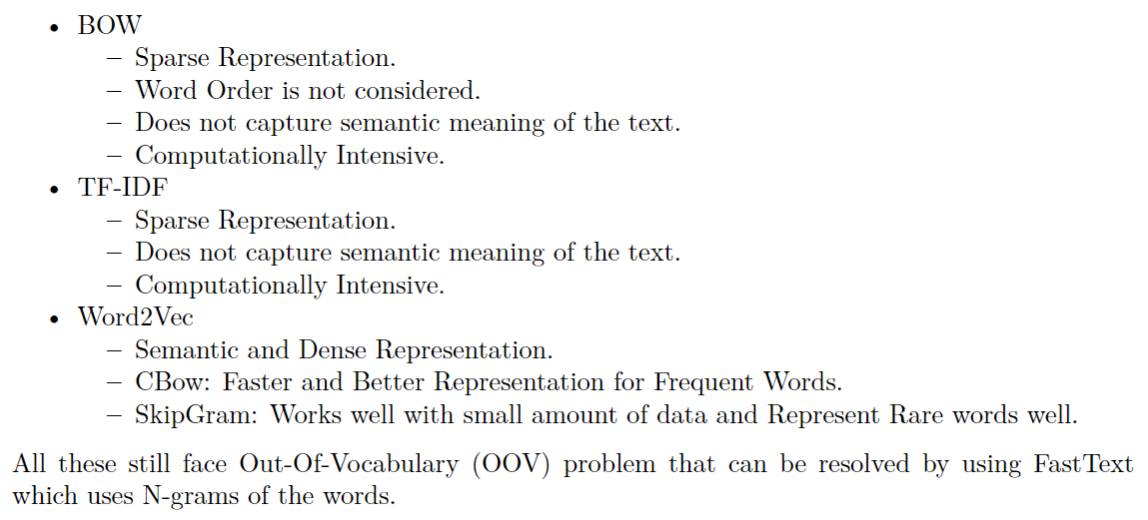